In [42]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import pyvista as pv

In [43]:
src = './inp/'
filename= 'depth_map_img_lbl.png'
#filename = 'Test.1423_Depth.png'
img = cv2.imread(src+filename)

def normalized(img_arr):
    nimg_arr = (img_arr-img_arr.min())/(img_arr.max()-img_arr.min())
    return nimg_arr

def imshow(img_arr):
    plt.figure(figsize=(7,7))
    plt.imshow(img_arr,cmap='gray')
    plt.axis('off')
    plt.show()
    
def scatter(x,y):
    plt.figure(figsize=(10,10))
    plt.scatter(x,y,marker='o',s=0.2)
    plt.axis('off')
    plt.show()

def find_edge(img_arr,val1=20,val2=120):
    return cv2.Canny(img_arr,val1,val2)

In [44]:
def plot_pcd(x,y,z):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(121, projection='3d')
    ax.scatter(x,y,z,c=z,cmap='jet',marker='.')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.view_init(90,90)
    
    ax = fig.add_subplot(122, projection='3d')
    ax.scatter(x,y,z,c=z,cmap='jet',marker='.')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.view_init(75,0)

In [45]:
img = Image.open(src+filename)
img = np.array(img)
#img = cv2.GaussianBlur(img,(13,13),0)

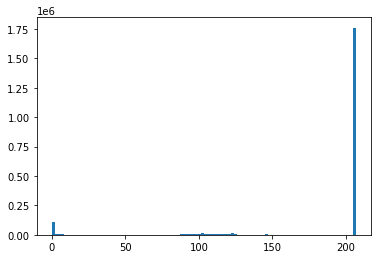

In [46]:
_ = plt.hist(img.flatten(),bins=100)
#_ = plt.xticks([0,.2,.4,.6,.8,1])

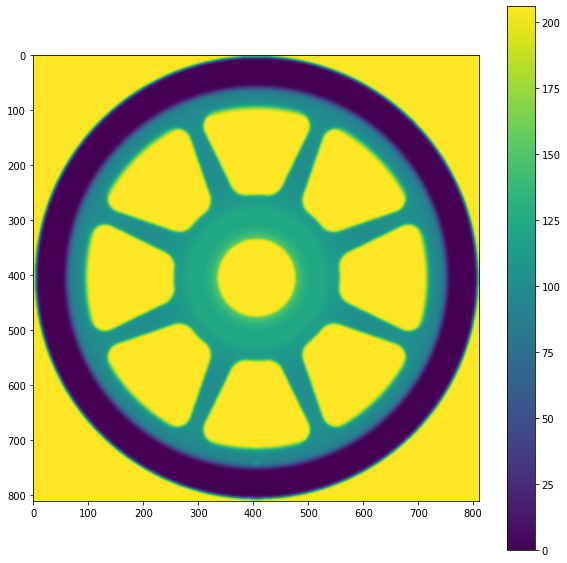

In [47]:
plt.figure(figsize=(10,10))
edg_im = find_edge(img,val1=180,val2=200)

(edg_x,edg_y) = np.where(edg_im == edg_im.max())

crop_im = img[edg_x.min()-5:edg_x.max()+5,edg_y.min()-5:edg_y.max()+5]
crop_im = cv2.GaussianBlur(crop_im,(13,13),0)
plt.imshow(crop_im)
plt.colorbar()

# pix 2 pntcld

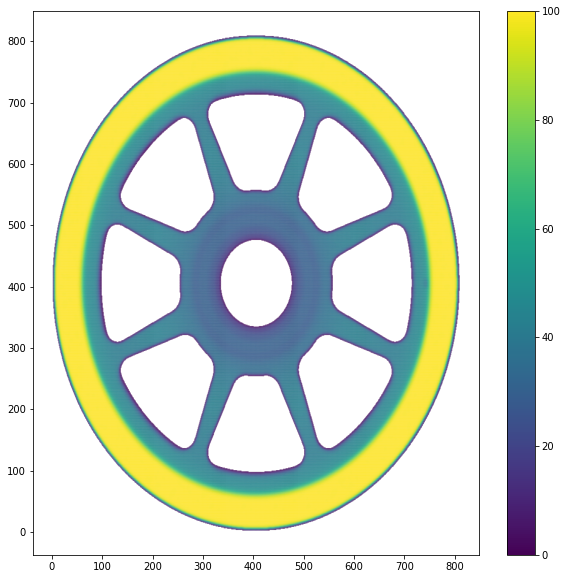

In [48]:
x,y = np.where(crop_im<=175)
z = normalized(crop_im[x,y])

z = -z*100+100

plt.figure(figsize=(10,10))
plt.scatter(x,y,c=z,s=.1,marker='.')
plt.colorbar()

In [58]:
org_pnts = np.array([x,y,z],dtype=np.float32).T
print(org_pnts.shape)

np.savetxt("point_clouds.txt", org_pnts, delimiter=", " , 
            newline="\n", comments="$ ", fmt="%1.2f",
            header="commented example text")

(319493, 3)


In [52]:

cloud = pv.PolyData(org_pnts)
#cloud.plot(point_size=3,scalars=points[smp_idx,2])

In [57]:
import pandas as pd
import numpy as np
import pyvista as pv
import pymeshfix as mf
import pyvista
pyvista.global_theme.background = 'white'
pyvista.global_theme.antialiasing = True

In [63]:
mesh_whl = pv.read('Final_result_decimated.stl')
mesh_whl.points = normalized(mesh_whl.points)

In [65]:
import pyvista as pv
import pymeshfix as mf

pl = pv.Plotter(shape=(1,3))
pl.subplot(0,0)
pl.add_points(cloud,point_size=3,scalars=z)
pl.subplot(0,1)
pl.add_mesh(mesh_whl, color='lightgrey',pbr=True, metallic=0.5, show_edges=True)
pl.subplot(0,2)
pl.add_mesh(mesh_whl, color='lightgrey',pbr=True, metallic=0.3, show_edges=False)
pl.export_html('result.html')